# Actividad - Visualización

* **Nombre:** Ramona Nájera Fuentes
* **Matrícula:** A01423596

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [9]:
# Carga las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga el conjunto de datos al ambiente de Google Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [5]:
# Muestra los primeros 6 renglones
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [6]:
# Crea una tabla resumen con los estadísticas generales de las variables numéricas
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [97]:
# ¿Cuál es el género con más publicaciones? 
df['Genre'].value_counts() # NON FICTION

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Text(0, 0.5, 'Frecuencia')

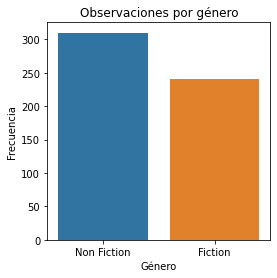

In [99]:
# Muéstralo en un gráfico

freq = plt.figure(figsize=(4,4))

sns.countplot(data=df, x='Genre')

plt.title('Observaciones por género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

In [157]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año?
top50 = pd.crosstab(df['Year'], df['Genre'])
top50

Genre,Fiction,Non Fiction
Year,,
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26


In [177]:
# ¿Hay algún año donde hubo más libros de ficción en el top 50?
topFict = []

def topFiction(row):
    if row['Fiction'] > row['Non Fiction']:
      topFict.append(row.name)

top50.apply(topFiction, axis=1)
topFict

[2014]

Text(0, 0.5, 'Frecuencia')

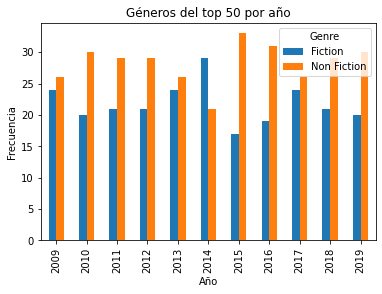

In [159]:
# Muéstralo en un gráfico
top50[['Fiction', 'Non Fiction']].plot(kind='bar')

plt.title('Géneros del top 50 por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

Text(0.5, 0, 'Reviews value')

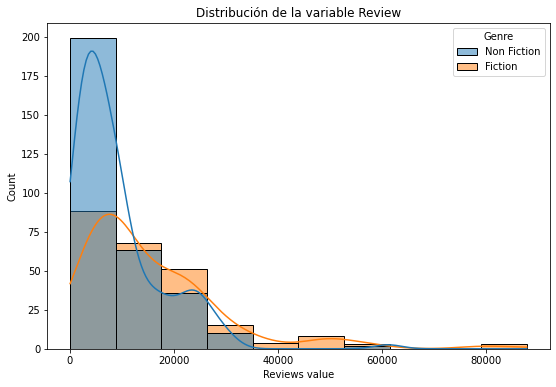

In [178]:
# ¿Cómo se distribuye la variable Review?
# Muéstra el histograma
rev = plt.figure(figsize=(9,6))

sns.histplot(data=df, x='Reviews', hue='Genre', bins=10, kde= True)

plt.title('Distribución de la variable Review')
plt.ylabel('Count')
plt.xlabel('Reviews value')

Text(0.5, 1.0, 'Distribución de la variable Review')

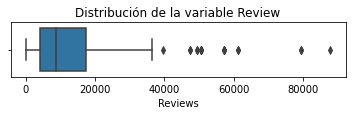

In [165]:
# Ahora muéstralo en un gráfico de caja y bigote

bnw = plt.figure(figsize=(6, 1))

sns.boxplot(data=df, x='Reviews')

plt.title('Distribución de la variable Review')

Text(0.5, 1.0, 'Evaluación del libro por género')

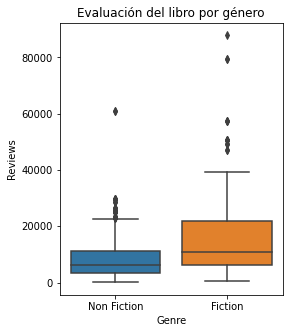

In [112]:
# ¿Cómo se compara la evaluación del libro por género?
# ¿Qué genero es mejor evaluado por los lectores? FICTION
# Muéstralo en un solo gráfico de caja y bigote

fig = plt.figure(figsize=(4,5))

sns.boxplot(data=df, x='Genre', y='Reviews')

plt.title('Evaluación del libro por género')

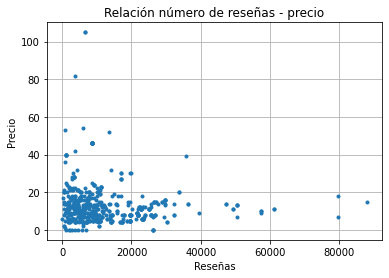

In [166]:
# ¿Cuál es la relación entre el número de reseñas y precios?
# Muéstralo en un gráfico de dispersión

fig = plt.figure(figsize=(6,4))

plt.plot(df['Reviews'], df['Price'], '.')

plt.title('Relación número de reseñas - precio')
plt.xlabel('Reseñas')
plt.ylabel('Precio')

plt.grid(True)

<Axes: >

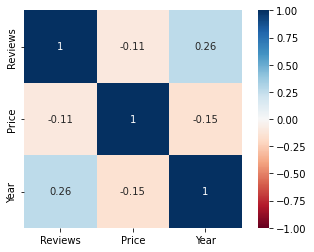

In [167]:
# De la pregunta anterior, ¿influye algo el año de publicación? MUY POCO
# ¿Cuál es la relación entre el número de reseñar, el precio y el año de publicación?
#   Relación DÉBIL positiva (Reviews - Year) negativa (Reviews - Price | Price - Year)
# IMPORTANTE: Selecciona una paleta de colores adeacuada.

corr = df[['Reviews', 'Price', 'Year']].corr()
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square=True)

<Axes: >

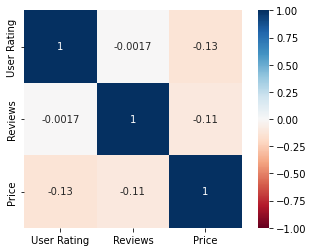

In [116]:
# ¿Cuál es la correlación entre las variables numéricas?
# Muéstralo en un gráfico
# La variable año, a pesar de ser numérica, la vamos a considerar como cualitativa

corrNum = df[['User Rating', 'Reviews', 'Price']].corr()
sns.heatmap(data=corrNum, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square=True)

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?

***Relación positiva***
*   User Rating - Reviews

***Relación negativa***
*   User Rating - Price
*   Reviews - Price

En general, dado que los coeficientes de relación son cercanos a 0, se podría concluir que las relaciones son débiles.

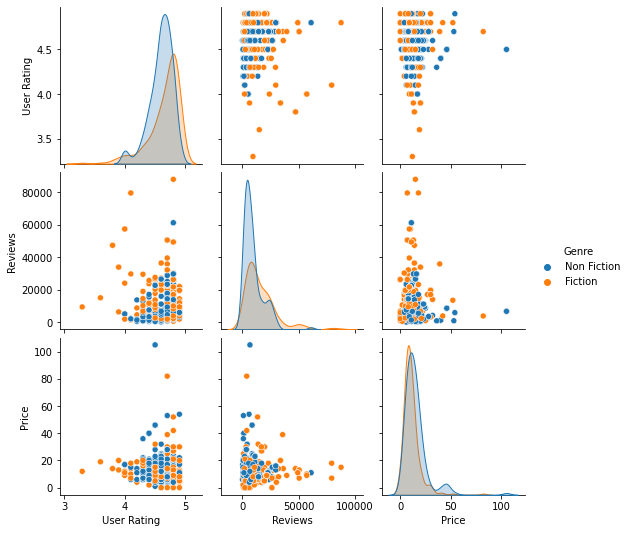

In [176]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables numéricas 
# Además, podamos ver el efecto del libro
# Año, a pesar de ser numérica, la vamos a considerar como cualitativa, así que la eliminaremos del análisis

sns.pairplot(data=df[['User Rating', 'Reviews', 'Price', 'Genre']], hue='Genre')